In [1]:
%load_ext autoreload
import trafpy.generator as tpg

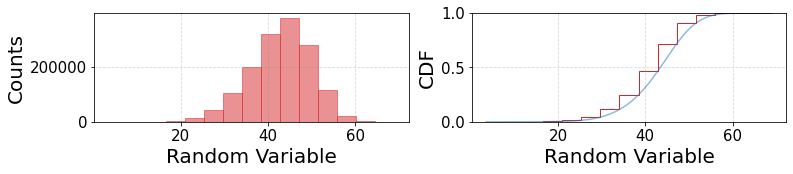

In [2]:
%autoreload
_ = tpg.gen_skewnorm_val_dist(location=50, skew=-2, scale=10, return_data=True, show_fig=True, num_bins=15)

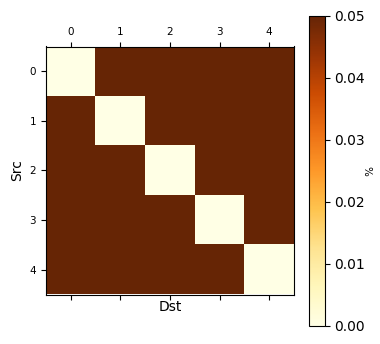

Src-dst edge weights in chord diagram are all the same, leading to 0 rescaled values. Decrease chord_edge_display_threshold to ensure a range of edge values are included in the chord diagram.


In [3]:
%autoreload
endpoints = ['server_'+str(i) for i in range(5)]
node_dist, fig = tpg.gen_uniform_node_dist(eps=endpoints,show_fig=True)

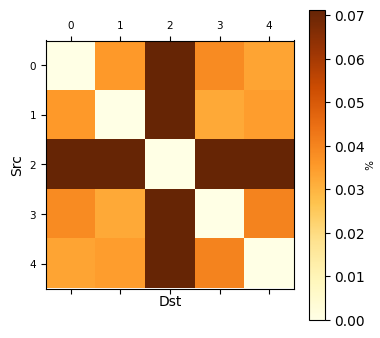

<Figure size 640x480 with 0 Axes>

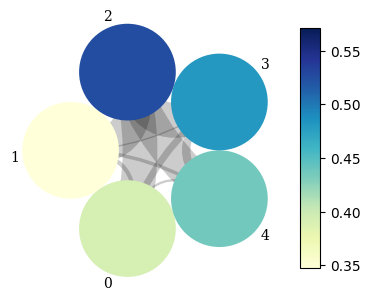

In [4]:
%autoreload
node_dist, fig = tpg.gen_multimodal_node_dist(eps=endpoints,skewed_nodes=['server_2'],show_fig=True)

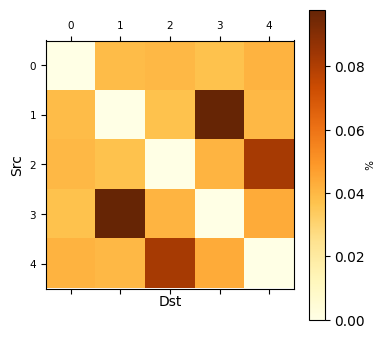

<Figure size 640x480 with 0 Axes>

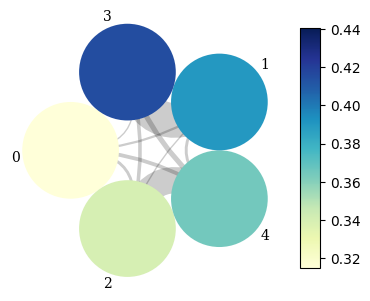

In [5]:
%autoreload
node_dist, fig = tpg.gen_multimodal_node_pair_dist(eps=endpoints, skewed_pairs=[['server_1','server_3'], ['server_4','server_2']], show_fig=True)

Racks dict:
{'rack_0': ['server_0', 'server_1', 'server_2', 'server_3'], 'rack_1': ['server_4', 'server_5', 'server_6', 'server_7'], 'rack_2': ['server_8', 'server_9', 'server_10', 'server_11'], 'rack_3': ['server_12', 'server_13', 'server_14', 'server_15']}


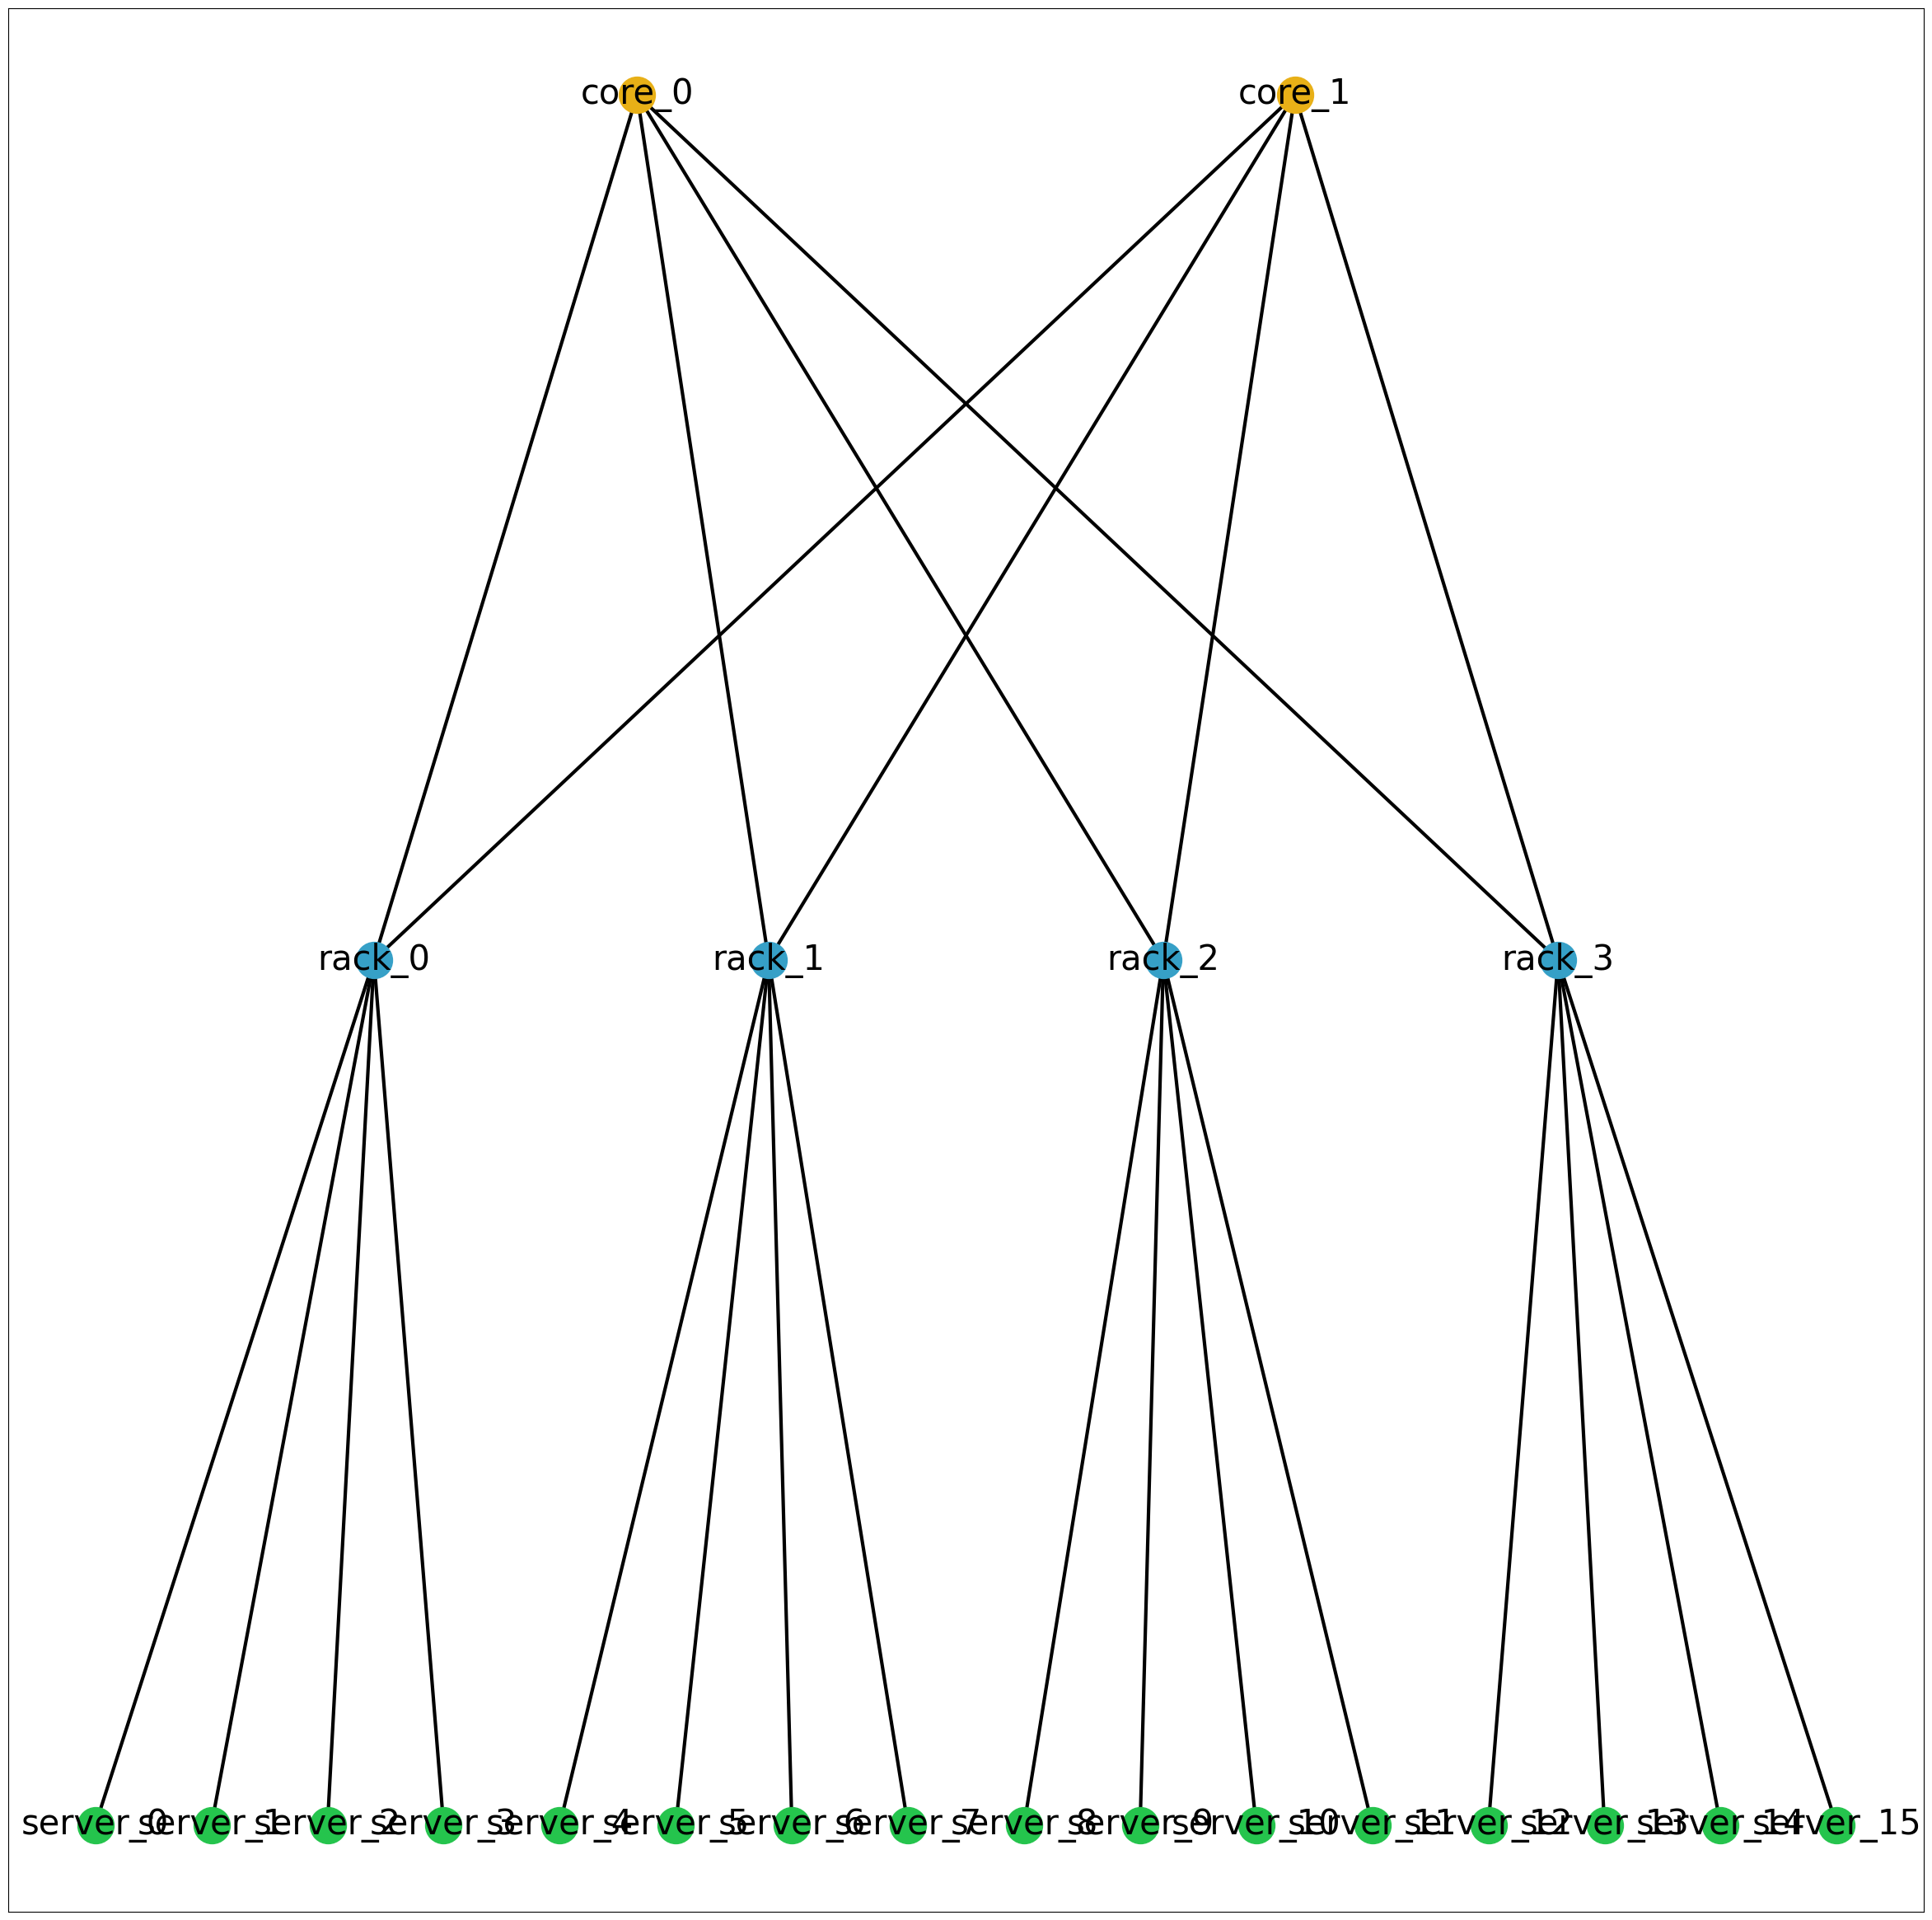

In [6]:
%autoreload
net = tpg.gen_fat_tree(k=4)
fig = tpg.plot_network(net, draw_node_labels=True, network_node_size=1000)
# net = tpg.gen_arbitrary_network(num_eps=10)
print('Racks dict:\n{}'.format(net.graph['rack_to_ep_dict']))

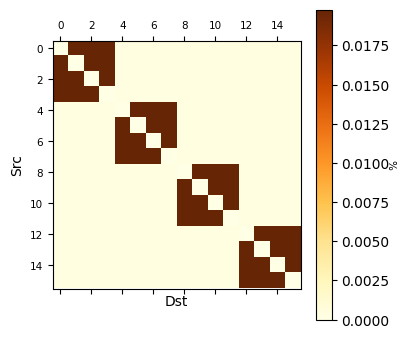

Src-dst edge weights in chord diagram are all the same, leading to 0 rescaled values. Decrease chord_edge_display_threshold to ensure a range of edge values are included in the chord diagram.


In [7]:
%autoreload
rack_prob_config = {'racks_dict': net.graph['rack_to_ep_dict'], 'prob_inter_rack': 0.05}
node_dist, _ = tpg.gen_uniform_node_dist(net.graph['endpoints'], rack_prob_config=rack_prob_config, show_fig=True, print_data=False)

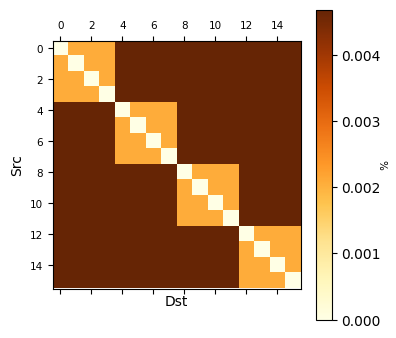

<Figure size 640x480 with 0 Axes>

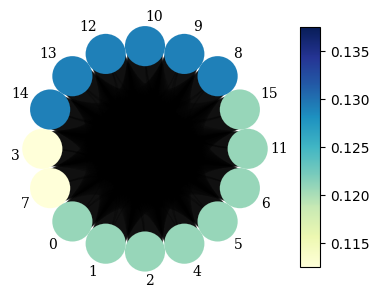

In [8]:
%autoreload
rack_prob_config = {'racks_dict': net.graph['rack_to_ep_dict'], 'prob_inter_rack': 0.9}
node_dist , _ = tpg.gen_uniform_node_dist(net.graph['endpoints'], rack_prob_config=rack_prob_config, show_fig=True, print_data=False)

In [13]:
%autoreload
import trafpy.generator as tpg
from trafpy.benchmarker import Benchmark

import math

class DefaultBenchmark(Benchmark):
    def __init__(self, benchmark_name='university', benchmark_version='v001', load_prev_dists=True):
        super(DefaultBenchmark, self).__init__(benchmark_name, benchmark_version, load_prev_dists)

    def get_node_dist(self, eps, racks_dict=None, dist_name='node_dist'):
        dist, path = super().get_node_dist(eps, racks_dict, dist_name)
        if dist is None or not self.load_prev_dists:
            num_skewed_nodes = math.ceil(0.2 * len(eps))
            skewed_node_probs = [0.55/num_skewed_nodes for _ in range(num_skewed_nodes)]
            if racks_dict is None:
                rack_prob_config = None
            else:
                rack_prob_config = {'racks_dict': racks_dict, 'prob_inter_rack': 0.7}
            dist = tpg.gen_multimodal_node_dist(eps, 
                                                rack_prob_config=rack_prob_config, 
                                                num_skewed_nodes=num_skewed_nodes, 
                                                skewed_node_probs=skewed_node_probs, 
                                                show_fig=False, 
                                                print_data=False)
            super().save_dist(dist, dist_name)
        return dist

    def get_interarrival_time_dist(self, dist_name='interarrival_time_dist'):
        dist, path = super().get_interarrival_time_dist(dist_name)
        if dist is None or not self.load_prev_dists:
            dist = tpg.gen_named_val_dist(dist='weibull',
                                            params={'_alpha': 0.9, '_lambda': 6000},
                                            min_val=1,
                                            round_to_nearest=25,
                                            show_fig=False,
                                            print_data=False)
            super().save_dist(dist, dist_name)
        return dist

    def get_flow_size_dist(self, dist_name='flow_size_dist'):
        dist, path = super().get_flow_size_dist(dist_name)
        if dist is None or not self.load_prev_dists:
            dist = tpg.gen_named_val_dist(dist='lognormal',
                                            params={'_mu': 7, '_sigma': 2.5},
                                            min_val=1,
                                            max_val=2e7,
                                            round_to_nearest=25,
                                            show_fig=False,
                                            print_data=False)
            super().save_dist(dist, dist_name)
        return dist


# temp for checking if this works
benchmark = DefaultBenchmark(benchmark_name='university_test', benchmark_version='v001', load_prev_dists=False)

net = tpg.gen_arbitrary_network(num_eps=10)
node_dist = benchmark.get_node_dist(net.graph['endpoints'], racks_dict=None, dist_name='node_dist')
interarrival_time_dist = benchmark.get_interarrival_time_dist(dist_name='interarrival_time_dist')
flow_size_dist = benchmark.get_flow_size_dist(dist_name='flow_size_dist')

Set to save benchmark university_test distribution data to /home/cwfparsonson/Insync/zciccwf@ucl.ac.uk/OneDriveBiz/ipes_cdt/phd_project/projects/trafpy/trafpy/benchmarker/versions/benchmark_v001/data/university_test/
Saved node_dist distribution data to /home/cwfparsonson/Insync/zciccwf@ucl.ac.uk/OneDriveBiz/ipes_cdt/phd_project/projects/trafpy/trafpy/benchmarker/versions/benchmark_v001/data/university_test/
Saved interarrival_time_dist distribution data to /home/cwfparsonson/Insync/zciccwf@ucl.ac.uk/OneDriveBiz/ipes_cdt/phd_project/projects/trafpy/trafpy/benchmarker/versions/benchmark_v001/data/university_test/
Saved flow_size_dist distribution data to /home/cwfparsonson/Insync/zciccwf@ucl.ac.uk/OneDriveBiz/ipes_cdt/phd_project/projects/trafpy/trafpy/benchmarker/versions/benchmark_v001/data/university_test/


In [16]:
%autoreload
from trafpy.benchmarker import BenchmarkImporter

importer = BenchmarkImporter(benchmark_version='v001', load_prev_dists=False)
dcn_dists = {}
# for dcn in ['university', 'private_enterprise', 'commercial_cloud', 'social_media_cloud']:
for dcn in ['university']:
    dcn_dists[dcn] = importer.get_benchmark_dists(benchmark_name=dcn, eps=net.graph['endpoints'])

load_prev_dist=False. Will re-generate dists with given network params and override any previously saved distributions.
Set to save benchmark university distribution data to /home/cwfparsonson/Insync/zciccwf@ucl.ac.uk/OneDriveBiz/ipes_cdt/phd_project/projects/trafpy/trafpy/benchmarker/versions/benchmark_v001/data/university/
Saved node_dist distribution data to /home/cwfparsonson/Insync/zciccwf@ucl.ac.uk/OneDriveBiz/ipes_cdt/phd_project/projects/trafpy/trafpy/benchmarker/versions/benchmark_v001/data/university/
Saved flow_size_dist distribution data to /home/cwfparsonson/Insync/zciccwf@ucl.ac.uk/OneDriveBiz/ipes_cdt/phd_project/projects/trafpy/trafpy/benchmarker/versions/benchmark_v001/data/university/
Saved interarrival_time_dist distribution data to /home/cwfparsonson/Insync/zciccwf@ucl.ac.uk/OneDriveBiz/ipes_cdt/phd_project/projects/trafpy/trafpy/benchmarker/versions/benchmark_v001/data/university/
